<h2>Questao 1</h2>

1 . Derive a solucao de minimos quadrados para um modelo de regressao linear simples sem intercept: $$ h(x) = \theta x$$

$$h(x) = \theta x \\
    \theta = argmin(\theta)\\
   $$
   

$$\\
    min\sum_{n=1}^{N} (Yn - \theta Xn)^2\\
     \\
$$

   $$\\ \frac{\partial h(x)}{\partial \theta}=0$$


   $$\\ \frac{\partial h(x)}{\partial \theta}= 2 \sum_{n=1}^{N}(Yn-\theta Xn)(-Xn)$$



   $$ \\ \frac{2 \sum_{n=1}^{N}(Yn-\theta Xn)(-Xn)}{2} = \frac{0}{2}$$

$$\sum_{n=1}^{N}(Yn-\theta Xn)(-Xn) = 0$$

$$\sum_{n=1}^{N}(-YnXn +\theta Xn^2)= 0$$

$$-\sum_{n=1}^{N}(YnXn) + \sum_{n=1}^{N}\theta Xn^2 = 0$$

$$ \sum_{n=1}^{N}\theta Xn^2 = \sum_{n=1}^{N}(YnXn) $$

$$ \frac{\sum_{n=1}^{N}\theta Xn^2}{N} = \frac{\sum_{n=1}^{N}(YnXn)}{N}$$

$$ \theta\bar{X}^2 = \bar{Y}\bar{X}\\ então \\
    \theta = \frac{\bar{Y}\bar{X}}{\bar X^2}
$$

<h4><b>$$\mathbf{Caso\ D > 1}\ (e\ nesse\ caso\ sem\ a\ coluna\ de\ 1's)$$</b></h4>

$$h(\overrightarrow{X}) = \theta_1 X_1 +\theta_2 X_2 +\theta_3 X_3 + ... + \theta_D X_D \\
    = \begin{bmatrix}X_1,X_2,X_3,\cdots,X_D\end{bmatrix} \cdot \begin{bmatrix}\theta_1\\\theta_2\\\theta_3\\\vdots\\\theta_D\end{bmatrix}
$$

$$= \overrightarrow{X}^T\cdot\overrightarrow{\theta}$$

$$\hat{\overrightarrow{\theta}_{LS}} = Argmin{\sum_{n=1}^{N}(Yn-Xn^T\theta )}$$

$$\overrightarrow{\nabla}\mathcal{L} =
\begin{bmatrix}\frac{\partial\mathcal{L}}{\partial\theta_1}
\\\frac{\partial\mathcal{L}}{\partial\theta_2}
\\\vdots
\\\frac{\partial\mathcal{L}}{\partial\theta_D}
\end{bmatrix} = \overrightarrow{0} \Longrightarrow \ \boxed{\hat{\overrightarrow{\theta}_{LS}} = (X^T X)^{-1} X^T Y} $$

<h2>Questão 2</h2>

In [47]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import torch


data = np.genfromtxt("data_reg_linear1.csv")
data

array([[ 7.30573058e-01,  2.86064100e+00],
       [-1.30129457e-02,  5.37946880e-01],
       [ 5.90290904e-01,  2.38156629e+00],
       [ 6.27897978e-02,  9.25019622e-01],
       [ 7.00009346e-01,  2.47626805e+00],
       [-7.75643289e-02,  3.25763017e-01],
       [-2.59629279e-01, -1.45846933e-01],
       [ 8.81043911e-01,  3.34444237e+00],
       [ 7.44084716e-01,  2.90335131e+00],
       [ 6.17884994e-01,  2.20204020e+00],
       [-4.14402485e-02,  1.31799415e-01],
       [-3.90228719e-01, -7.23208547e-01],
       [ 5.09231925e-01,  1.75033271e+00],
       [ 4.11199450e-01,  1.90085793e+00],
       [-1.96901977e-01,  1.44542724e-01],
       [-2.70248145e-01, -3.23220134e-01],
       [-1.98296100e-01,  1.35667354e-01],
       [ 4.55479383e-01,  1.92043686e+00],
       [ 3.19734216e-01,  1.42258716e+00],
       [ 5.26294351e-01,  2.04628444e+00],
       [ 5.52491903e-01,  2.12816715e+00],
       [-4.68174964e-01, -1.08393371e+00],
       [ 7.52682686e-01,  3.05182838e+00],
       [ 3.

In [2]:
x = data[:,:-1]
n = x[:].shape
ones = np.ones(n)
x_andBias = np.concatenate((ones, x), axis=1)

<h4><b>$$\mathbf{Modelo\ com\ o\ \theta_0}$$</b></h4>

In [3]:
y = data[:,-1]
theta_ls = np.linalg.inv(x_andBias.T @ x_andBias)@ x_andBias.T @ y
y_test = x_andBias @ theta_ls
error = np.mean((y-y_test)**2)

<h4>$$\mathbf{Modelo \ sem \ o\ \theta_0}$$ </h4>

In [4]:
theta = np.linalg.inv(x.T @ x) @ x.T @ y
y_test2 = x * theta
erro2 = np.mean((y-y_test2)**2)
erro2

3.722584417003046

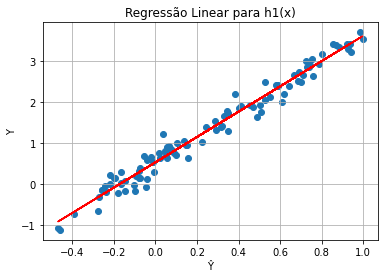

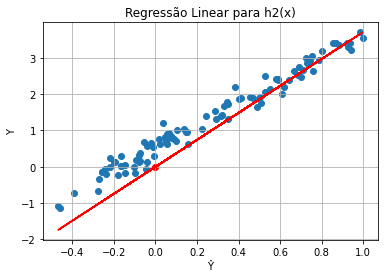

In [15]:
plt.scatter(x, y)
plt.plot(x,y_test,color = 'r')
plt.title("Regressão Linear para h1(x)")
plt.grid(True)
plt.xlabel("Ŷ")
plt.ylabel("Y")
plt.show()


plt.scatter(x, y)
plt.grid(True)
plt.plot(x,y_test2,color = 'r')
plt.scatter(0, 0,color ='r')#Origem
plt.title("Regressão Linear para h2(x)")
plt.xlabel("Ŷ")
plt.ylabel("Y")
plt.show()


<h2>Questao 3</h2>

<p>De forma resumida, explique a estrutura básica do dataset: qual o problema e quais as
variáveis envolvidas?</p>

<p>The Boston housing dataset, é um conjunto de dados que contem informações coletadas pelo Serviço de Censo dos Estados Unidos, possui o tamanho de 506 casos.<br> 
    As duas principais tarefas para esse dataset é a previsão do nivel de óxido nitroso e o valor mediano de uma casa.
    Havendo 14 atributos para cada caso, sao eles:
    <ol>
        <li>CRIM - a Taxa de Criminalidade per capita</li>
        <li>ZN - Proporção de terrenos residenciais zoneados para lotes com mais 25 pés quadrados</li>
        <li>INDUS - Proporção de acres nao varejistas por cidade</li>
        <li>Chas</li>
        <li>NOX - Concentração de óxidos nítricos</li>
        <li>RM - Número médio de cômodos por habitação</li>
        <li>AGE - Proporção de casas ocupadas antes de 1940</li>
        <li>DIS - Distancias poderadas</li>
        <li>RAD - Índicie de acessibilidade a rodovias radiais</li>
        <li>TAX - Taxa de imposto sobre propriedade</li>
        <li>PTRATIO - Proporção professor-aluno por cidade</li>
        <li>B - proporção de negros por cidade</li>
        <li>LSTAT - porcentagem da população de uma classe menos favorecida</li>
        <li>MEDV - Valor médio de casas ocupadas pelo proprietário em US$ 1.000</li>
    </ol>
</p>


In [84]:
import requests
from bs4 import BeautifulSoup

req = requests.get('http://lib.stat.cmu.edu/datasets/boston')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content
soup = BeautifulSoup(content, 'html.parser')
with open('boston_houses_dataset.txt', 'w', encoding='utf-8') as f_out:
    f_out.write(soup.prettify())

D = np.genfromtxt("HousingData.csv",skip_header=1, delimiter=",")
aux = D[:,1].shape
N_total = aux[0]
N = int(.8*N_total)


Requisição bem sucedida!


In [198]:
x_Dataset = D[:N,:-1]
bias = np.ones(N).reshape(-1,1)
X = np.concatenate((bias, x_Dataset), axis=1)

y_Dataset = D[:N:,-1]


theta = np.linalg.inv(X.T @ X + (10**-4)*np.identity(14))@ X.T @ y_Dataset
theta

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])